In [1]:
from pydataset import data
from scipy import stats
import env
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import acquire
import prepare
import warnings

# number 4

In [2]:
df_iris = data('iris')

In [3]:
df_iris.head(3) #first 3 rows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape #shape of df rows x columns

(150, 5)

In [5]:
df_iris.dtypes #column data type/

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [6]:
df_iris.describe() #summary statistics

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Number 5

In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [8]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:

print(df_google.shape)
print(df_google.info())
print(df_google.describe())
df_google.head(3)

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [10]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Number 6

In [11]:
df_excel = pd.read_excel('train.xlsx', sheet_name='train') #call for one argument (sheet)

In [12]:
df_excel_sample = df_excel.head(100)

In [13]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_excel_sample.shape

(100, 12)

In [15]:
df_excel.shape[0] #amount of rows only

891

In [16]:
df_excel.columns[0:5] #print specific columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [17]:
df_excel.columns[0:5].to_list()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex']

In [18]:
df_excel.select_dtypes(include= 'object').columns.tolist() #column names that have object as value

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [19]:
int_cols = df_excel.select_dtypes(include= [int])
float_cols = df_excel.select_dtypes(include= [float])

In [20]:
float_cols

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [21]:
df3=pd.concat([int_cols, float_cols],axis=1,join='inner')

In [22]:
col_ranges = df3.max() - df3.min()

In [23]:
col_ranges #calculated ranges for every numeric columns

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
SibSp            8.0000
Parch            6.0000
Age             79.5800
Fare           512.3292
dtype: float64

In [24]:
import acquire

In [25]:
acquire.get_titanic_data() #function created to get titanic data

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [26]:
acquire.get_iris_data()

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,4,5,5.0,3.6,1.4,0.2,1,1,setosa
5,5,6,5.4,3.9,1.7,0.4,1,1,setosa
6,6,7,4.6,3.4,1.4,0.3,1,1,setosa
7,7,8,5.0,3.4,1.5,0.2,1,1,setosa
8,8,9,4.4,2.9,1.4,0.2,1,1,setosa
9,9,10,4.9,3.1,1.5,0.1,1,1,setosa


In [27]:
acquire.get_telco_data()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,No,2,Yes,2,65.60,593.3,No,DSL,One year,Mailed check
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,Yes,1,No,2,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,No,1,Yes,1,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,Yes,1,Yes,1,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,No,1,Yes,2,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,...,No,2,No,2,55.15,742.9,No,DSL,One year,Mailed check
7039,7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,...,Yes,1,Yes,1,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,...,No,1,Yes,2,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,...,Yes,3,No,2,67.85,4627.65,No,DSL,Two year,Mailed check


# Data Preperation

In [28]:
df = acquire.get_iris_data()

In [29]:
df.shape

(150, 9)

In [30]:
df.head()

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      150 non-null    int64  
 1   measurement_id  150 non-null    int64  
 2   sepal_length    150 non-null    float64
 3   sepal_width     150 non-null    float64
 4   petal_length    150 non-null    float64
 5   petal_width     150 non-null    float64
 6   species_id      150 non-null    int64  
 7   species_id.1    150 non-null    int64  
 8   species_name    150 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 10.7+ KB


In [32]:
df.describe()

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,75.500000,5.843333,3.057333,3.758000,1.199333,2.000000,2.000000
std,43.445368,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232,0.819232
min,0.000000,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000,1.000000
25%,37.250000,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000,1.000000
50%,74.500000,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000,2.000000
75%,111.750000,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000,3.000000
max,149.000000,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000,3.000000


In [33]:
df = df.drop_duplicates()

In [34]:
df.drop(columns = ['species_id', 'measurement_id'], inplace = True)

In [35]:
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_id.1,species_name
0,0,5.1,3.5,1.4,0.2,1,setosa
1,1,4.9,3.0,1.4,0.2,1,setosa
2,2,4.7,3.2,1.3,0.2,1,setosa
3,3,4.6,3.1,1.5,0.2,1,setosa
4,4,5.0,3.6,1.4,0.2,1,setosa
5,5,5.4,3.9,1.7,0.4,1,setosa
6,6,4.6,3.4,1.4,0.3,1,setosa
7,7,5.0,3.4,1.5,0.2,1,setosa
8,8,4.4,2.9,1.4,0.2,1,setosa
9,9,4.9,3.1,1.5,0.1,1,setosa


In [36]:
df.rename(columns = {'species_name':'species'}, inplace = True)

In [37]:
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_id.1,species
0,0,5.1,3.5,1.4,0.2,1,setosa
1,1,4.9,3.0,1.4,0.2,1,setosa
2,2,4.7,3.2,1.3,0.2,1,setosa
3,3,4.6,3.1,1.5,0.2,1,setosa
4,4,5.0,3.6,1.4,0.2,1,setosa
5,5,5.4,3.9,1.7,0.4,1,setosa
6,6,4.6,3.4,1.4,0.3,1,setosa
7,7,5.0,3.4,1.5,0.2,1,setosa
8,8,4.4,2.9,1.4,0.2,1,setosa
9,9,4.9,3.1,1.5,0.1,1,setosa


In [38]:
dummy_df = pd.get_dummies(df[['species']], dummy_na=False, drop_first=[True])
dummy_df.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [39]:
df = pd.concat([df, dummy_df], axis=1)
df.head(1)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_id.1,species,species_versicolor,species_virginica
0,0,5.1,3.5,1.4,0.2,1,setosa,0,0


In [40]:
df # function for data prep iris is made

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_id.1,species,species_versicolor,species_virginica
0,0,5.1,3.5,1.4,0.2,1,setosa,0,0
1,1,4.9,3.0,1.4,0.2,1,setosa,0,0
2,2,4.7,3.2,1.3,0.2,1,setosa,0,0
3,3,4.6,3.1,1.5,0.2,1,setosa,0,0
4,4,5.0,3.6,1.4,0.2,1,setosa,0,0
5,5,5.4,3.9,1.7,0.4,1,setosa,0,0
6,6,4.6,3.4,1.4,0.3,1,setosa,0,0
7,7,5.0,3.4,1.5,0.2,1,setosa,0,0
8,8,4.4,2.9,1.4,0.2,1,setosa,0,0
9,9,4.9,3.1,1.5,0.1,1,setosa,0,0


In [41]:
dftitanic = acquire.get_titanic_data()

In [42]:
dftitanic.dropna()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
6,6,6,0,1,male,54.0,0,0,51.8625,S,First,E,Southampton,1
10,10,10,1,3,female,4.0,1,1,16.7000,S,Third,G,Southampton,0
11,11,11,1,1,female,58.0,0,0,26.5500,S,First,C,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,871,871,1,1,female,47.0,1,1,52.5542,S,First,D,Southampton,0
872,872,872,0,1,male,33.0,0,0,5.0000,S,First,B,Southampton,1
879,879,879,1,1,female,56.0,0,1,83.1583,C,First,C,Cherbourg,0
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1


In [43]:
dftitanic.drop(columns = ['Unnamed: 0', 'passenger_id', 'survived', 'pclass', 'sibsp', 'parch', 'alone', 'embarked'], inplace = True)

In [44]:
dftitanic

,sex,age,fare,class,deck,embark_town
0,male,22.0,7.2500,Third,NaN,Southampton
1,female,38.0,71.2833,First,C,Cherbourg
2,female,26.0,7.9250,Third,NaN,Southampton
3,female,35.0,53.1000,First,C,Southampton
4,male,35.0,8.0500,Third,NaN,Southampton
...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,NaN,Southampton
887,female,19.0,30.0000,First,B,Southampton
888,female,NaN,23.4500,Third,NaN,Southampton
889,male,26.0,30.0000,First,C,Cherbourg


In [45]:
dummy_df = pd.get_dummies(dftitanic[['sex']], dummy_na=False, drop_first=[True])
dftitanic = pd.concat([dftitanic, dummy_df], axis=1)

In [46]:
dummy_df = pd.get_dummies(dftitanic[['class']], dummy_na=False, drop_first=[True])
dftitanic = pd.concat([dftitanic, dummy_df], axis=1)

dummy_df = pd.get_dummies(dftitanic[['deck']], dummy_na=False, drop_first=[True])
dftitanic = pd.concat([dftitanic, dummy_df], axis=1)

dummy_df = pd.get_dummies(dftitanic[['embark_town']], dummy_na=False, drop_first=[True])
dftitanic = pd.concat([dftitanic, dummy_df], axis=1)

In [47]:
dftitanic

,sex,age,fare,class,deck,embark_town,sex_male,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
0,male,22.0,7.2500,Third,NaN,Southampton,1,0,1,0,0,0,0,0,0,0,1
1,female,38.0,71.2833,First,C,Cherbourg,0,0,0,0,1,0,0,0,0,0,0
2,female,26.0,7.9250,Third,NaN,Southampton,0,0,1,0,0,0,0,0,0,0,1
3,female,35.0,53.1000,First,C,Southampton,0,0,0,0,1,0,0,0,0,0,1
4,male,35.0,8.0500,Third,NaN,Southampton,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,NaN,Southampton,1,1,0,0,0,0,0,0,0,0,1
887,female,19.0,30.0000,First,B,Southampton,0,0,0,1,0,0,0,0,0,0,1
888,female,NaN,23.4500,Third,NaN,Southampton,0,0,1,0,0,0,0,0,0,0,1
889,male,26.0,30.0000,First,C,Cherbourg,1,0,0,0,1,0,0,0,0,0,0


In [48]:
df = acquire.get_titanic_data()

In [49]:
df

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [50]:
prepare.prep_titanic(df) #function for titanic data prep

,sex,age,fare,class,deck,embark_town,sex_male,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton
1,female,38.0,71.2833,First,C,Cherbourg,0,0,0,0,1,0,0,0,0,0,0
3,female,35.0,53.1000,First,C,Southampton,0,0,0,0,1,0,0,0,0,0,1
6,male,54.0,51.8625,First,E,Southampton,1,0,0,0,0,0,1,0,0,0,1
10,female,4.0,16.7000,Third,G,Southampton,0,0,1,0,0,0,0,0,1,0,1
11,female,58.0,26.5500,First,C,Southampton,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,female,47.0,52.5542,First,D,Southampton,0,0,0,0,0,1,0,0,0,0,1
872,male,33.0,5.0000,First,B,Southampton,1,0,0,1,0,0,0,0,0,0,1
879,female,56.0,83.1583,First,C,Cherbourg,0,0,0,0,1,0,0,0,0,0,0
887,female,19.0,30.0000,First,B,Southampton,0,0,0,1,0,0,0,0,0,0,1


In [51]:
df = acquire.get_telco_data() #function to acquire telco data

In [52]:
df.drop(columns = ['Unnamed: 0', 'internet_service_type_id',\
                          'contract_type_id',\
                          'payment_type_id',\
                          ], inplace = True)

In [53]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,DSL,One year,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,DSL,Month-to-month,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Fiber optic,Month-to-month,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Fiber optic,Month-to-month,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Fiber optic,Month-to-month,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,DSL,One year,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Fiber optic,Month-to-month,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,DSL,Month-to-month,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,DSL,Two year,Mailed check


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [55]:
dummy_df = pd.get_dummies(df[['gender']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['partner']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['dependents']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['phone_service']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['multiple_lines']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['online_security']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['online_backup']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['device_protection']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['tech_support']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['streaming_movies']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['paperless_billing']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['churn']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['internet_service_type']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['contract_type']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['payment_type']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)
dummy_df = pd.get_dummies(df[['streaming_tv']], dummy_na=False, drop_first=[True])
df = pd.concat([df, dummy_df], axis=1)

In [56]:
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,streaming_tv_No internet service,streaming_tv_Yes
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,0,0,1,0,0,0,1,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,0,0,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,1,0,0,0,0,1,0,0,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,1,0,0,0,0,1,0,0,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,1,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,1,1,0,0,0,0,1,0,0,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,1,0,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,0,0,1,0,0,1,0,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [58]:
df = acquire.get_iris_data()

In [59]:
df = prepare.prep_iris(df)

In [60]:

train, test =\
train_test_split(df, \
                 test_size=.1,\
                 random_state=123, stratify=df.species)
train, validate =\
train_test_split(train,\
                 test_size=.3,\
                 random_state=123,\
                 stratify=train.species)

In [61]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (94, 9)
validate -> (41, 9)
test -> (15, 9)


In [62]:

warnings.filterwarnings("ignore")

In [63]:
train

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_id.1,species,species_versicolor,species_virginica
98,98,5.1,2.5,3.0,1.1,2,versicolor,1,0
124,124,6.7,3.3,5.7,2.1,3,virginica,0,1
105,105,7.6,3.0,6.6,2.1,3,virginica,0,1
9,9,4.9,3.1,1.5,0.1,1,setosa,0,0
141,141,6.9,3.1,5.1,2.3,3,virginica,0,1
57,57,4.9,2.4,3.3,1.0,2,versicolor,1,0
109,109,7.2,3.6,6.1,2.5,3,virginica,0,1
19,19,5.1,3.8,1.5,0.3,1,setosa,0,0
126,126,6.2,2.8,4.8,1.8,3,virginica,0,1
59,59,5.2,2.7,3.9,1.4,2,versicolor,1,0


In [64]:
train.drop(columns = ["species_versicolor", "species_virginica", "Unnamed: 0", "species_id.1"])

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,versicolor
124,6.7,3.3,5.7,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
9,4.9,3.1,1.5,0.1,setosa
141,6.9,3.1,5.1,2.3,virginica
57,4.9,2.4,3.3,1.0,versicolor
109,7.2,3.6,6.1,2.5,virginica
19,5.1,3.8,1.5,0.3,setosa
126,6.2,2.8,4.8,1.8,virginica
59,5.2,2.7,3.9,1.4,versicolor


# Exploration Exercises
### Analyzing iris data more and creating vizualizations

In [65]:
iris_df = acquire.get_iris_data()

In [66]:
iris_df

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,4,5,5.0,3.6,1.4,0.2,1,1,setosa
5,5,6,5.4,3.9,1.7,0.4,1,1,setosa
6,6,7,4.6,3.4,1.4,0.3,1,1,setosa
7,7,8,5.0,3.4,1.5,0.2,1,1,setosa
8,8,9,4.4,2.9,1.4,0.2,1,1,setosa
9,9,10,4.9,3.1,1.5,0.1,1,1,setosa


In [67]:
iris_df = iris_df.drop(columns = ["Unnamed: 0", "species_id", "species_id.1"])

In [68]:
iris_df

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


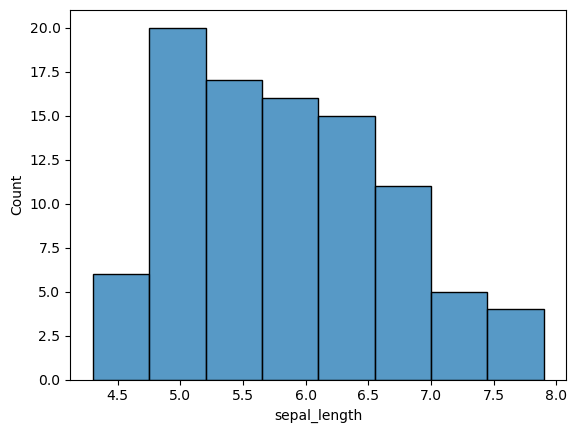

In [69]:
sns.histplot(train.sepal_length)
plt.show()

<AxesSubplot:xlabel='sepal_length'>

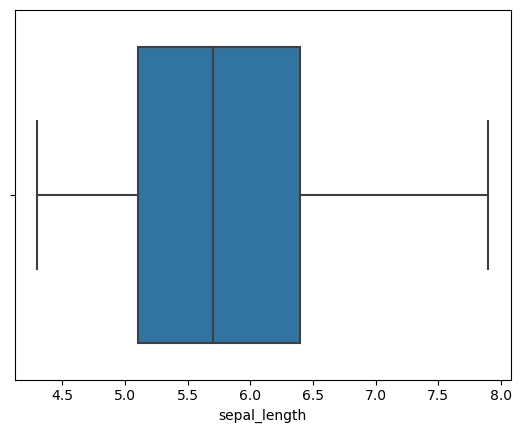

In [70]:
sns.boxplot(train.sepal_length)

In [71]:
train.sepal_length.describe()

count    94.000000
mean      5.825532
std       0.846871
min       4.300000
25%       5.100000
50%       5.700000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

# Below shows sepal width disributions

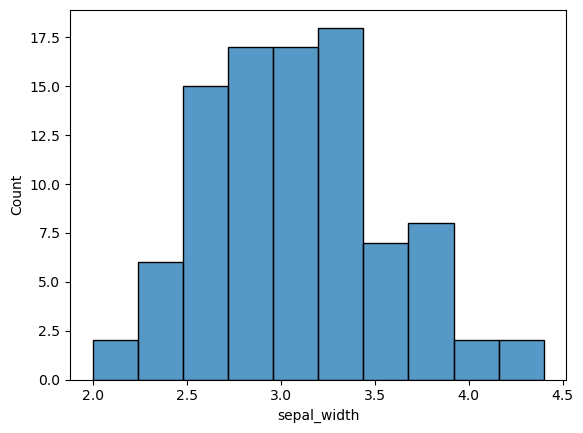

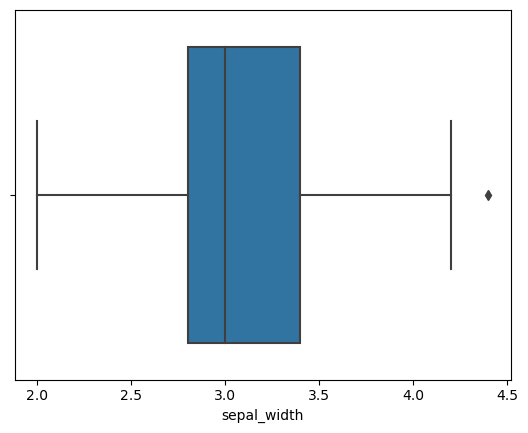

count    94.000000
mean      3.076596
std       0.475965
min       2.000000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64

In [72]:
sns.histplot(train.sepal_width)
plt.show()
sns.boxplot(train.sepal_width)
plt.show()
train.sepal_width.describe()

# below shows petal length

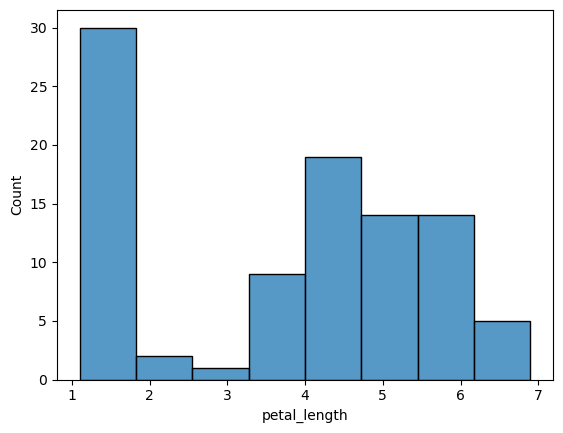

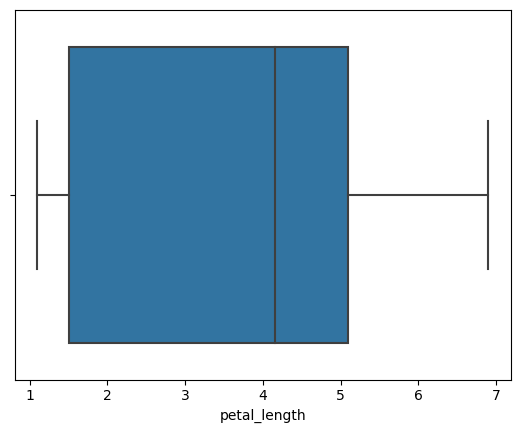

count    94.000000
mean      3.715957
std       1.797507
min       1.100000
25%       1.500000
50%       4.150000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

In [73]:
sns.histplot(train.petal_length)
plt.show()
sns.boxplot(train.petal_length)
plt.show()
train.petal_length.describe()

# below shoes petal width

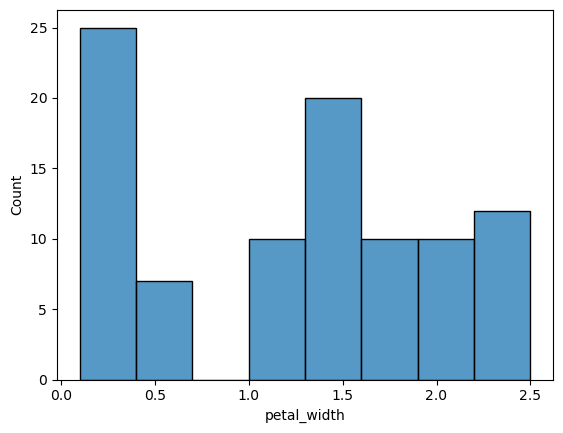

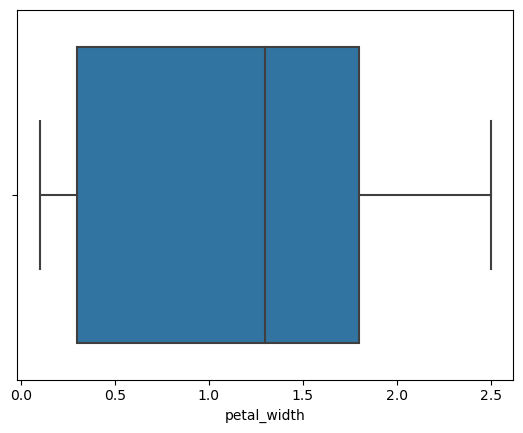

count    94.000000
mean      1.184043
std       0.773944
min       0.100000
25%       0.300000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

In [74]:
sns.histplot(train.petal_width)
plt.show()
sns.boxplot(train.petal_width)
plt.show()
train.petal_width.describe()

<AxesSubplot:xlabel='species', ylabel='count'>

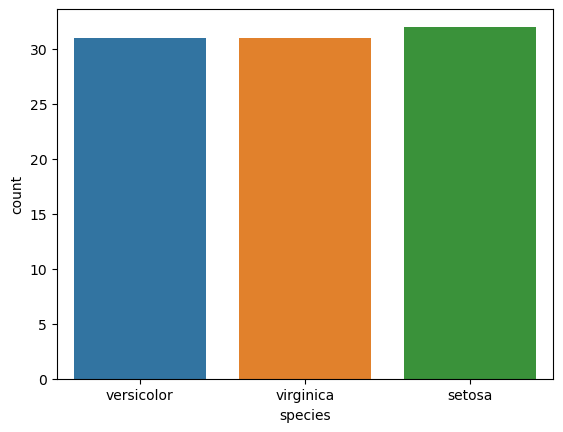

In [75]:
sns.countplot(train.species)

### key findings:
sepal_length appears approximately normal
sepal_width appears approximately normal that conforms slightly more to a normal distribution than sepal_length
petal_length appears slightly skewed right
petal_width also appears slightly skewed right
data appears to have equal amounts of each species of flower.


In [76]:
sepal_length_avg= train.sepal_length.mean()
sepal_width_avg= train.sepal_width.mean()
petal_length_avg= train.petal_length.mean()
petal_width_avg= train.petal_width.mean()

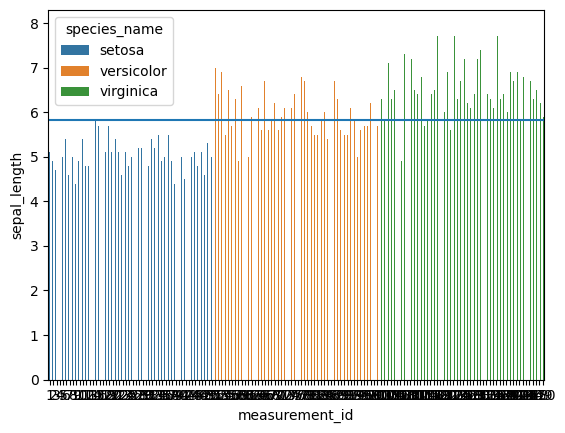

In [77]:
sns.barplot(data=iris_df, x="measurement_id", y= "sepal_length", hue= "species_name")
plt.axhline(sepal_length_avg)

Text(0.5, 1.0, 'Average sepal_length for each species')

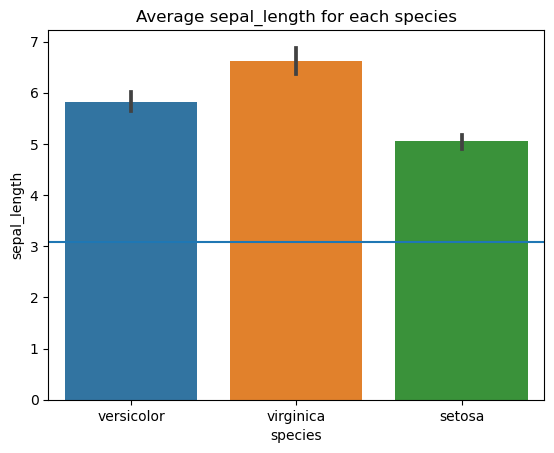

In [78]:
col = 'sepal_length'
sns.barplot(x="species", y= col,data=train)
plt.axhline(sepal_width_avg)
plt.title(f'Average {col} for each species')

In [ ]:
sns.barplot(data=iris_df, x="measurement_id", y= "petal_length", hue= "species_name")
plt.axhline(petal_length_avg)

In [ ]:
sns.barplot(data=iris_df, x="measurement_id", y= "petal_width", hue= "species_name")
plt.axhline(petal_width_avg)

In [ ]:
train.sepal_length.describe()


In [ ]:
train.sepal_width.describe()

In [ ]:
train.petal_length.describe()

In [ ]:
train.petal_width.describe()

### final test


In [ ]:
mean_petal_virginica = iris_df[iris_df["species_name"] == "virginica"]

In [ ]:
mean_petal_virginica_width = mean_petal_virginica.petal_width.mean()

In [ ]:
mean_petal_versicolor= train[train["species"] == "versicolor"]

In [ ]:
mean_petal_versicolor_width = mean_petal_versicolor.petal_width.mean()

In [ ]:
t, p = stats.mannwhitneyu(mean_petal_versicolor.petal_width, mean_petal_virginica.petal_width)

In [ ]:
t, p ## yes there is a signifigant difference bettwen the petal widths means of the virginica and versicolor
#species

## multivar part 1

In [ ]:
sns.relplot(x='petal_length', y='petal_width', data=train, hue = "species")

In [ ]:
sns.relplot(x='sepal_length', y='sepal_width', data=train, hue = "species")

In [ ]:
train

In [ ]:
train = train.drop(columns = ["species_versicolor", "species_virginica", "Unnamed: 0", "species_id.1"])

In [ ]:
sns.pairplot(data = train, hue = "species", corner = True)

In [ ]:
meltplot = pd.melt(train, id_vars=['species'], value_vars=['petal_length', 'petal_width', 'sepal_length', 'sepal_width'])

In [ ]:
meltplot

In [ ]:
sns.swarmplot(data=meltplot, x="variable", y="value", hue="species")

the above graph shows that the virginica flower has the greatest values for all variables except sepal_width
when it comes to sepal_width, the setosa appears to have the greatest, but has the lowest in all other variables

In [ ]:
mean_petal_virginica = iris_df[iris_df["species_name"] == "virginica"]
mean_petal_versicolor= iris_df[iris_df["species_name"] == "versicolor"]
t, p = stats.mannwhitneyu(mean_petal_versicolor.sepal_width, mean_petal_virginica.sepal_width)

#  question, are veriscolor and verginica sepal widths signifigantly different?

the answer is yes.

In [ ]:
t, p

## part 2

In [ ]:
titanic_df=acquire.get_titanic_data()

In [ ]:
titanic_df

In [ ]:
titanic_df["survived"] = titanic_df["survived"].replace(0, 'no')

In [ ]:
titanic_df

In [ ]:
sns.histplot(data=titanic_df, x="survived", hue="class", multiple = "dodge", shrink = .5)

In [ ]:
first = titanic_df[titanic_df["class"] == "First"]
second= titanic_df[titanic_df["class"] == "Second"]
third = titanic_df[titanic_df["class"] == "Third"]

In [ ]:
crosstb1 = pd.crosstab(index = first['survived'],  \
                      columns = first['class'] , \
                      normalize=True) *100
crosstb2 = pd.crosstab(index = second['survived'],  \
                      columns = second['class'] , \
                      normalize=True) *100
crosstb3 = pd.crosstab(index = third['survived'],  \
                      columns = third['class'] , \
                      normalize=True) *100

In [ ]:
crosstb2

In [ ]:
percentage = pd.concat([crosstb1, crosstb2, crosstb3], axis=1)

In [ ]:
percentage

In [ ]:
percentage = pd.DataFrame([[63, 47.3, 24.2], [37, 52.7, 75.8]], index = [1, 2], columns = ['First', 'Second', 'Third'])

In [ ]:
percentage

In [ ]:
percentage['survived'] = ['no','yes']

In [ ]:
percentage

In [ ]:
sns.barplot(data=percentage, x="survived",y="First", hue = "survived")

In [ ]:
percentage = pd.DataFrame([['First', 'yes', 37],\
                           ['First', 'no', 63],\
                          ['Second', 'yes', 53],\
                          ['Second', 'no', 47],\
                          ['Third', 'yes', 76],\
                          ['Third', 'no', 24]], index = [1, 2, 3, 4, 5, 6], columns = ['classes', 'survived', 'ratio'])

In [ ]:
sns.barplot(data=percentage, x="classes",y="ratio", hue = "survived")

In [ ]:
observed = pd.crosstab(titanic_df['class'], titanic_df.survived)

In [ ]:
stats.chi2_contingency(observed)